# Facebook Data Crawling
After the data is collected, we need to process the data to make it more readable and easier to analyze. We can do some simple visualization to see the data distribution and the relationship between the data. We can also do some simple data cleaning to remove the data that is not needed. In this notebook, we will do some simple data processing on the data we collected from Facebook.

In [23]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd.read_csv('Data/anhdadenchuanmen.csv')


In [26]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s', origin='unix', utc=True)


df


post_id                                               text  \
0   890312635787063                          T·ªõn c·∫£ m·∫Øt l√™n\n#anhdaden   
1   889438769207783                       Chu√¥ng c·ª≠a x·ªãn x√≤\n#anhdaden   
2   890306872454306                          Hay l·∫Øm c√¥ g√°i\n#anhdaden   
3   889437592541234                    Con trai c√≥ hi·∫øu qu√°\n#anhdaden   
4   890295609122099                      H·∫°nh ph√∫c bi·∫øt bao\n#anhdaden   
5   889436292541364               C√°c ch√°u ng√†y nay tu·ªïi g√¨\n#anhdaden   
6   890291159122544                            Ng√¥n l√π lu√¥n\n#anhdaden   
7   890286305789696                               K·ª≥ z·∫≠y ta\n#anhdaden   
8   889436939207966                           Pha n√†y h·ªõ t√≠\n#anhdaden   
9   890283015790025                             Anh tu·ªïi g√¨\n#anhdaden   
10  889436669207993                       C·∫£ l√†ng s∆∞·ªõng nh√©\n#anhdaden   
11  890278145790512                                ƒê·∫≥ng c·∫•p\n#anhdaden   
12  889440345874292              Kh√¥ng l√†m g√¨ n·ªØa h·∫£ anh ∆°i\n#anhdaden   
13  889899099161750                                   ·∫¢o ma\n#anhdaden   
14  890350789116581  20h30 t·ªëi nay Shopee show C·∫∑p ƒê√¥i B√≠ ·∫®n v·ªõi s·ª±...   
15  889866949164965                        Xem g·ªõt n∆∞·ªõc m·∫Øt\n#anhdaden   
16  889856139166046                       C≈©ng mu·ªën l·∫Øm ch·ª©\n#anhdaden   
17  889843462500647                               Out tr√¨nh\n#anhdaden   
18  889836839167976                            V·∫≠y m·ªõi ƒë√∫ng\n#anhdaden   
19  889384025879924                     B√¨nh tƒ©nh b√¨nh tƒ©nh\n#anhdaden   
20  889805729171087               T∆∞·ªüng ƒë√πa m√† t√¥i order ƒë∆∞·ª£c th·∫≠t :))   
21  886985159453144                          V·∫•n ƒë·ªÅ kƒ© nƒÉng\n#anhdaden   
22  889377292547264                 M·ªôt ch√∫t ch·∫øc trong tim\n#anhdaden   
23  889284075889919                          S∆∞·ªõng th·∫≠t ch·ª©\n#anhdaden   
24  889365192548474                         Coi b·ªô c≈©ng hay\n#anhdaden   
25  889357275882599                        G·∫∑p ngay cao th·ªß\n#anhdaden   
26  888898689261791                                H·∫£o ng√†i\n#anhdaden   
27  888835315934795                            Ch·ªù quen r·ªìi\n#anhdaden   
28  888823662602627                               Nhanh l·∫Øm\n#anhdaden   
29  888806992604294  C√πng l≈© b·∫°n th∆∞·ªüng th·ª©c th√¨ con g√¨ b·∫±ng\n#anhd...   
30  888440619307598                          Th·∫•u hi·ªÉu lu√¥n\n#anhdaden   
31  886351982849795                           Xui thi·ªát ch·ª©\n#anhdaden   
32  888409845977342                               Tuy·ªát v·ªùi\n#anhdaden   
33  888380245980302                         H·ªçc h√†nh g√¨ n·ªói\n#anhdaden   
34  888372019314458                             Ngoan c·ªë n√®\n#anhdaden   
35  885834006234926                       Bi·∫øt th·∫ø kh·ªèi h·ªèi\n#anhdaden   
36  886963222788671                                  P√≥ tay\n#anhdaden   
37  886955376122789                               Xong lu√¥n\n#anhdaden   
38  886937632791230                           H∆°n c·∫£ m·∫π r·ªìi\n#anhdaden   
39  886941559457504  ƒêam m√™ l√†m th·ª£ h·ªì nh∆∞ng b·ªë m·∫π b·∫Øt ƒëi l√†m th·ª£ h...   
40  885837356234591                       May m√† c√≥ ·ªï g√† ƒë√≥\n#anhdaden   
41  886935226124804                          L√† y√™u d·ªØ ch∆∞a\n#anhdaden   
42  886929946125332                         B√†y ƒë·∫∑t ƒëua ƒë√≤i\n#anhdaden   
43  886927612792232                                   ·∫¢o ma\n#anhdaden   
44  885836966234630                 Ch·∫Øc kh√¥ng ph·∫£i anh r·ªìi\n#anhdaden   
45  886921486126178                                Toi lu√¥n\n#anhdaden   
46  886907676127559                           Chia tay lu√¥n\n#anhdaden   
47  887001052784888  T√¥i m√πng 8 nh·∫≠n l∆∞∆°ng m√† nay ƒë√£ kh√¥ng c√≤n xu n...   
48  886890416129285                      T√¥i c√≥ l√†m chi ƒë√¢u\n#anhdaden   
49  886889632796030                       

In [27]:
df.dropna(axis=1,inplace=True,how='all')
df

post_id                                               text  \
0   890312635787063                          T·ªõn c·∫£ m·∫Øt l√™n\n#anhdaden   
1   889438769207783                       Chu√¥ng c·ª≠a x·ªãn x√≤\n#anhdaden   
2   890306872454306                          Hay l·∫Øm c√¥ g√°i\n#anhdaden   
3   889437592541234                    Con trai c√≥ hi·∫øu qu√°\n#anhdaden   
4   890295609122099                      H·∫°nh ph√∫c bi·∫øt bao\n#anhdaden   
5   889436292541364               C√°c ch√°u ng√†y nay tu·ªïi g√¨\n#anhdaden   
6   890291159122544                            Ng√¥n l√π lu√¥n\n#anhdaden   
7   890286305789696                               K·ª≥ z·∫≠y ta\n#anhdaden   
8   889436939207966                           Pha n√†y h·ªõ t√≠\n#anhdaden   
9   890283015790025                             Anh tu·ªïi g√¨\n#anhdaden   
10  889436669207993                       C·∫£ l√†ng s∆∞·ªõng nh√©\n#anhdaden   
11  890278145790512                                ƒê·∫≥ng c·∫•p\n#anhdaden   
12  889440345874292              Kh√¥ng l√†m g√¨ n·ªØa h·∫£ anh ∆°i\n#anhdaden   
13  889899099161750                                   ·∫¢o ma\n#anhdaden   
14  890350789116581  20h30 t·ªëi nay Shopee show C·∫∑p ƒê√¥i B√≠ ·∫®n v·ªõi s·ª±...   
15  889866949164965                        Xem g·ªõt n∆∞·ªõc m·∫Øt\n#anhdaden   
16  889856139166046                       C≈©ng mu·ªën l·∫Øm ch·ª©\n#anhdaden   
17  889843462500647                               Out tr√¨nh\n#anhdaden   
18  889836839167976                            V·∫≠y m·ªõi ƒë√∫ng\n#anhdaden   
19  889384025879924                     B√¨nh tƒ©nh b√¨nh tƒ©nh\n#anhdaden   
20  889805729171087               T∆∞·ªüng ƒë√πa m√† t√¥i order ƒë∆∞·ª£c th·∫≠t :))   
21  886985159453144                          V·∫•n ƒë·ªÅ kƒ© nƒÉng\n#anhdaden   
22  889377292547264                 M·ªôt ch√∫t ch·∫øc trong tim\n#anhdaden   
23  889284075889919                          S∆∞·ªõng th·∫≠t ch·ª©\n#anhdaden   
24  889365192548474                         Coi b·ªô c≈©ng hay\n#anhdaden   
25  889357275882599                        G·∫∑p ngay cao th·ªß\n#anhdaden   
26  888898689261791                                H·∫£o ng√†i\n#anhdaden   
27  888835315934795                            Ch·ªù quen r·ªìi\n#anhdaden   
28  888823662602627                               Nhanh l·∫Øm\n#anhdaden   
29  888806992604294  C√πng l≈© b·∫°n th∆∞·ªüng th·ª©c th√¨ con g√¨ b·∫±ng\n#anhd...   
30  888440619307598                          Th·∫•u hi·ªÉu lu√¥n\n#anhdaden   
31  886351982849795                           Xui thi·ªát ch·ª©\n#anhdaden   
32  888409845977342                               Tuy·ªát v·ªùi\n#anhdaden   
33  888380245980302                         H·ªçc h√†nh g√¨ n·ªói\n#anhdaden   
34  888372019314458                             Ngoan c·ªë n√®\n#anhdaden   
35  885834006234926                       Bi·∫øt th·∫ø kh·ªèi h·ªèi\n#anhdaden   
36  886963222788671                                  P√≥ tay\n#anhdaden   
37  886955376122789                               Xong lu√¥n\n#anhdaden   
38  886937632791230                           H∆°n c·∫£ m·∫π r·ªìi\n#anhdaden   
39  886941559457504  ƒêam m√™ l√†m th·ª£ h·ªì nh∆∞ng b·ªë m·∫π b·∫Øt ƒëi l√†m th·ª£ h...   
40  885837356234591                       May m√† c√≥ ·ªï g√† ƒë√≥\n#anhdaden   
41  886935226124804                          L√† y√™u d·ªØ ch∆∞a\n#anhdaden   
42  886929946125332                         B√†y ƒë·∫∑t ƒëua ƒë√≤i\n#anhdaden   
43  886927612792232                                   ·∫¢o ma\n#anhdaden   
44  885836966234630                 Ch·∫Øc kh√¥ng ph·∫£i anh r·ªìi\n#anhdaden   
45  886921486126178                                Toi lu√¥n\n#anhdaden   
46  886907676127559                           Chia tay lu√¥n\n#anhdaden   
47  887001052784888  T√¥i m√πng 8 nh·∫≠n l∆∞∆°ng m√† nay ƒë√£ kh√¥ng c√≤n xu n...   
48  886890416129285                      T√¥i c√≥ l√†m chi ƒë√¢u\n#anhdaden   
49  886889632796030                       

In [28]:
first_row = df.iloc[0]
first_row['reactions']
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] =first_row['comments']
reactions

{'th√≠ch': 282,
 'y√™u th√≠ch': 1,
 'haha': 355,
 'th∆∞∆°ng th∆∞∆°ng': 1,
 'bu·ªìn': 9,
 'shares': 5,
 'comments': 15}

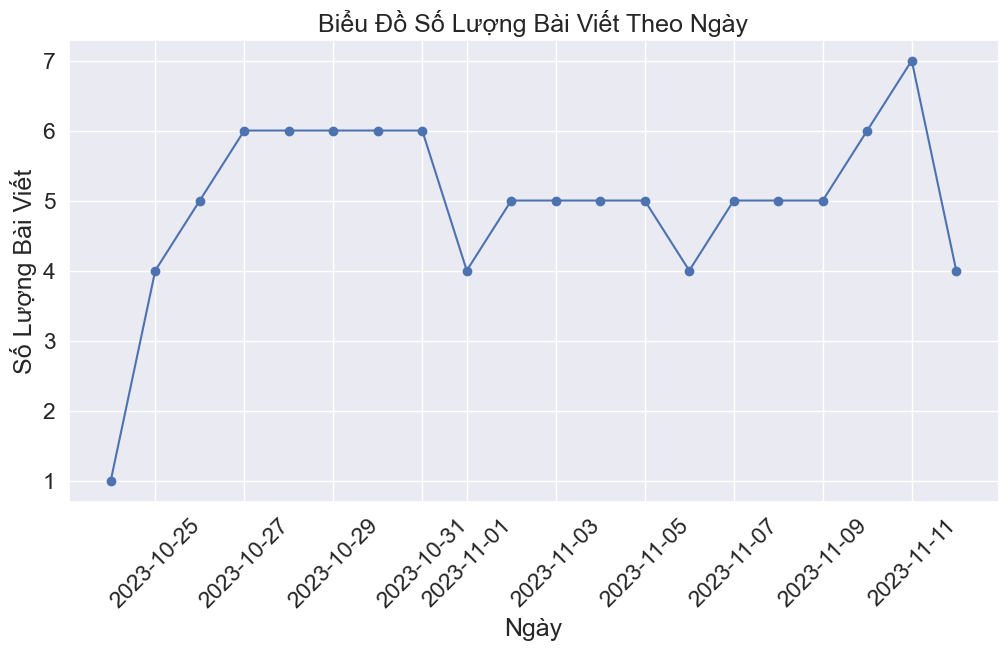

TypeError: can only concatenate str (not "int") to str

<Figure size 1200x600 with 0 Axes>

In [29]:


# Replace 'raw_df' with the actual name of your DataFrame


# Check if the required columns are present
required_columns = ['th√≠ch', 'y√™u th√≠ch', 'haha', 'th∆∞∆°ng th∆∞∆°ng', 'bu·ªìn', 'shares', 'comments']



# Bi·ªÉu ƒë·ªì th·ªùi gian ƒëƒÉng b√†i
df['time'] = pd.to_datetime(df['time'])
df['date'] = df['time'].dt.date
posts_by_date = df['date'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.plot(posts_by_date.index, posts_by_date.values, marker='o')
plt.title('Bi·ªÉu ƒê·ªì S·ªë L∆∞·ª£ng B√†i Vi·∫øt Theo Ng√†y')
plt.xlabel('Ng√†y')
plt.ylabel('S·ªë L∆∞·ª£ng B√†i Vi·∫øt')
plt.xticks(rotation=45)
plt.show()

# Bi·ªÉu ƒë·ªì t∆∞∆°ng t√°c (reactions, comments, shares)
plt.figure(figsize=(12, 6))
df[['reactions', 'comments', 'shares']].sum().plot(kind='bar', color=['blue', 'green', 'orange'])
plt.title('T·ªïng S·ªë L∆∞·ª£ng T∆∞∆°ng T√°c (reactions, Comments, Shares)')
plt.xlabel('Lo·∫°i T∆∞∆°ng T√°c')
plt.ylabel('T·ªïng S·ªë L∆∞·ª£ng')
plt.show()


# Bi·ªÉu ƒë·ªì s·ªë l∆∞·ª£ng ·∫£nh trong b√†i vi·∫øt
df['image_count'] = df['images'].apply(len)
plt.figure(figsize=(12, 6))
df['image_count'].value_counts().sort_index().plot(kind='bar', color='red')
plt.title('Bi·ªÉu ƒê·ªì S·ªë L∆∞·ª£ng ·∫¢nh Trong B√†i Vi·∫øt')
plt.xlabel('S·ªë L∆∞·ª£ng ·∫¢nh')
plt.ylabel('S·ªë L∆∞·ª£ng B√†i Vi·∫øt')
plt.show()


## Reactions analysis

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and

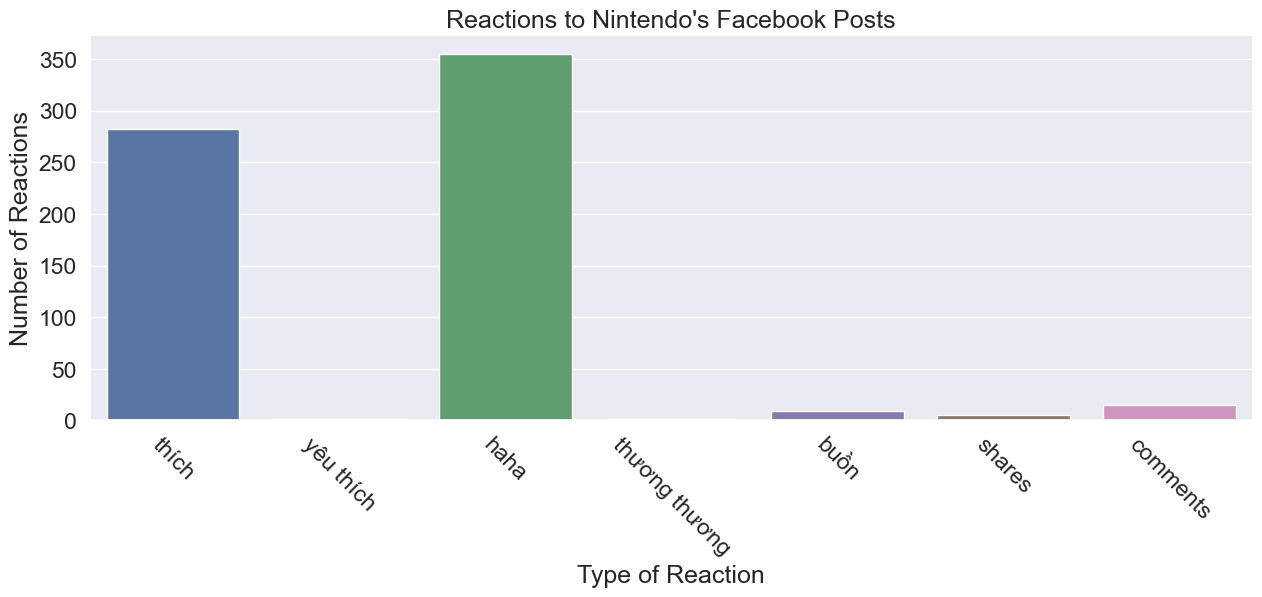

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale=1.5)

# plot the reactions
fig, ax = plt.subplots()
ax = sns.barplot(x=list(reactions.keys()), y=list(reactions.values()))
ax.set_title("Reactions to Nintendo's Facebook Posts")
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")
plt.xticks(rotation=-45)
plt.show()

## Read all posts

In [ ]:
#df_text = post_df_full[['post_id','post_text']]
df_text= pd.read_csv('Data/anhdadenchuanmen.csv').dropna(axis=1,how='all')
text    = str(df_text['post_text'])

df_text

post_id                                               text  \
0   890312635787063                          T·ªõn c·∫£ m·∫Øt l√™n\n#anhdaden   
1   889438769207783                       Chu√¥ng c·ª≠a x·ªãn x√≤\n#anhdaden   
2   890306872454306                          Hay l·∫Øm c√¥ g√°i\n#anhdaden   
3   889437592541234                    Con trai c√≥ hi·∫øu qu√°\n#anhdaden   
4   890295609122099                      H·∫°nh ph√∫c bi·∫øt bao\n#anhdaden   
5   889436292541364               C√°c ch√°u ng√†y nay tu·ªïi g√¨\n#anhdaden   
6   890291159122544                            Ng√¥n l√π lu√¥n\n#anhdaden   
7   890286305789696                               K·ª≥ z·∫≠y ta\n#anhdaden   
8   889436939207966                           Pha n√†y h·ªõ t√≠\n#anhdaden   
9   890283015790025                             Anh tu·ªïi g√¨\n#anhdaden   
10  889436669207993                       C·∫£ l√†ng s∆∞·ªõng nh√©\n#anhdaden   
11  890278145790512                                ƒê·∫≥ng c·∫•p\n#anhdaden   
12  889440345874292              Kh√¥ng l√†m g√¨ n·ªØa h·∫£ anh ∆°i\n#anhdaden   
13  889899099161750                                   ·∫¢o ma\n#anhdaden   
14  890350789116581  20h30 t·ªëi nay Shopee show C·∫∑p ƒê√¥i B√≠ ·∫®n v·ªõi s·ª±...   
15  889866949164965                        Xem g·ªõt n∆∞·ªõc m·∫Øt\n#anhdaden   
16  889856139166046                       C≈©ng mu·ªën l·∫Øm ch·ª©\n#anhdaden   
17  889843462500647                               Out tr√¨nh\n#anhdaden   
18  889836839167976                            V·∫≠y m·ªõi ƒë√∫ng\n#anhdaden   
19  889384025879924                     B√¨nh tƒ©nh b√¨nh tƒ©nh\n#anhdaden   
20  889805729171087               T∆∞·ªüng ƒë√πa m√† t√¥i order ƒë∆∞·ª£c th·∫≠t :))   
21  886985159453144                          V·∫•n ƒë·ªÅ kƒ© nƒÉng\n#anhdaden   
22  889377292547264                 M·ªôt ch√∫t ch·∫øc trong tim\n#anhdaden   
23  889284075889919                          S∆∞·ªõng th·∫≠t ch·ª©\n#anhdaden   
24  889365192548474                         Coi b·ªô c≈©ng hay\n#anhdaden   
25  889357275882599                        G·∫∑p ngay cao th·ªß\n#anhdaden   
26  888898689261791                                H·∫£o ng√†i\n#anhdaden   
27  888835315934795                            Ch·ªù quen r·ªìi\n#anhdaden   
28  888823662602627                               Nhanh l·∫Øm\n#anhdaden   
29  888806992604294  C√πng l≈© b·∫°n th∆∞·ªüng th·ª©c th√¨ con g√¨ b·∫±ng\n#anhd...   
30  888440619307598                          Th·∫•u hi·ªÉu lu√¥n\n#anhdaden   
31  886351982849795                           Xui thi·ªát ch·ª©\n#anhdaden   
32  888409845977342                               Tuy·ªát v·ªùi\n#anhdaden   
33  888380245980302                         H·ªçc h√†nh g√¨ n·ªói\n#anhdaden   
34  888372019314458                             Ngoan c·ªë n√®\n#anhdaden   
35  885834006234926                       Bi·∫øt th·∫ø kh·ªèi h·ªèi\n#anhdaden   
36  886963222788671                                  P√≥ tay\n#anhdaden   
37  886955376122789                               Xong lu√¥n\n#anhdaden   
38  886937632791230                           H∆°n c·∫£ m·∫π r·ªìi\n#anhdaden   
39  886941559457504  ƒêam m√™ l√†m th·ª£ h·ªì nh∆∞ng b·ªë m·∫π b·∫Øt ƒëi l√†m th·ª£ h...   
40  885837356234591                       May m√† c√≥ ·ªï g√† ƒë√≥\n#anhdaden   
41  886935226124804                          L√† y√™u d·ªØ ch∆∞a\n#anhdaden   
42  886929946125332                         B√†y ƒë·∫∑t ƒëua ƒë√≤i\n#anhdaden   
43  886927612792232                                   ·∫¢o ma\n#anhdaden   
44  885836966234630                 Ch·∫Øc kh√¥ng ph·∫£i anh r·ªìi\n#anhdaden   
45  886921486126178                                Toi lu√¥n\n#anhdaden   
46  886907676127559                           Chia tay lu√¥n\n#anhdaden   
47  887001052784888  T√¥i m√πng 8 nh·∫≠n l∆∞∆°ng m√† nay ƒë√£ kh√¥ng c√≤n xu n...   
48  886890416129285                      T√¥i c√≥ l√†m chi ƒë√¢u\n#anhdaden   
49  886889632796030                       

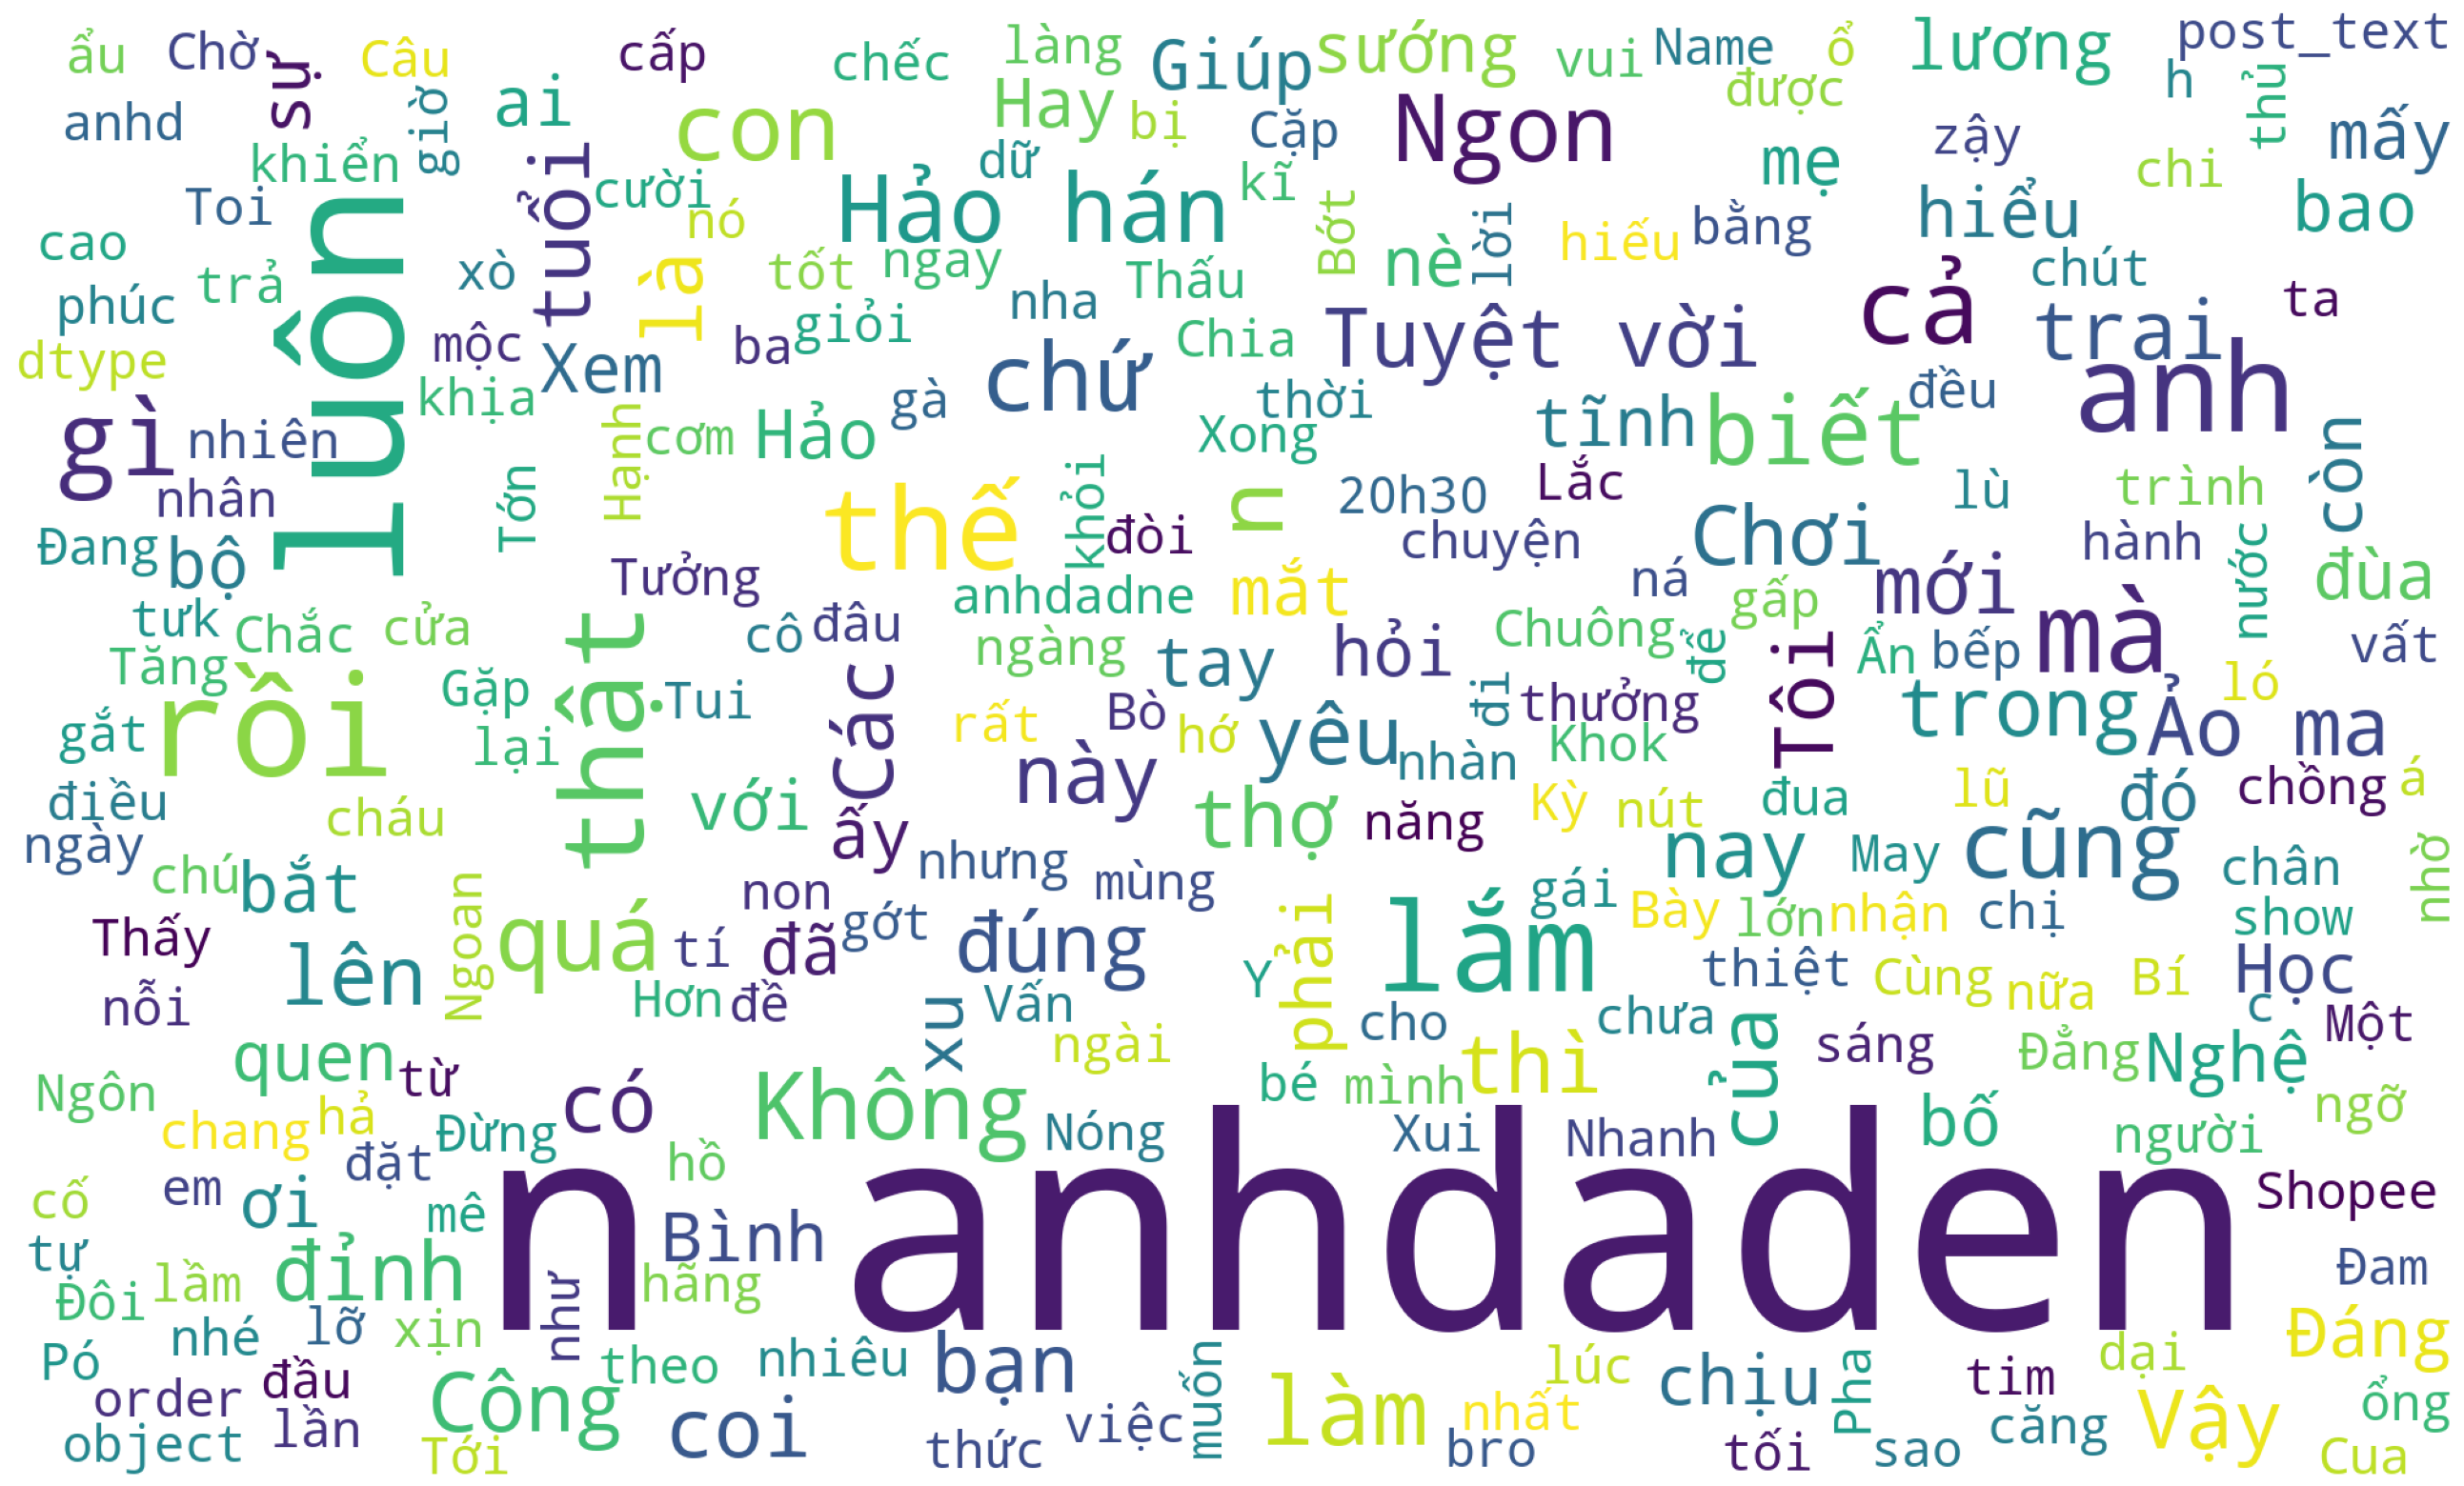

In [ ]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()